In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pydsm
import math

os.listdir("/media/ayush/DATA1/Hydrophone Recording/")

['.ipynb_checkpoints',
 '0 Degree Horizontal.csv',
 '0 Degree Vertical.csv',
 '11 Degree Horizontal.csv',
 '11 Degree Vertical.csv',
 '30_5_19.csv',
 '45 Degree Horizontal.csv',
 '45 Degree Vertical.csv',
 'actual.csv',
 'actual_read.csv',
 'Recording 1',
 'recordings']

In [2]:
D0H_df = pd.read_csv("/media/ayush/DATA1/Hydrophone Recording/actual.csv")
print("Shape of the recording CSV: " + str(D0H_df.shape))
D0H_df.head()

/home/ayush/Projects/mlpython3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape of the recording CSV: (3000003, 8)


,Timestamp,13-06-19 11:58:37 PM,Timestamp.1,13-06-19 11:58:37 PM.1,Timestamp.2,13-06-19 11:58:37 PM.2,Timestamp.3,13-06-19 11:58:37 PM.3
0,Interval,1E-05,Interval,1E-05,Interval,1E-05,Interval,1E-05
1,Channel name,Input 0,Channel name,Input 1,Channel name,Input 2,Channel name,Input 3
2,Unit,V,Unit,V,Unit,V,Unit,V
3,0,0.0040781250000000019,0,0.00038469800000000016,0,0.00013290499999999989,0,0.00061198700000000003
4,1E-05,0.0040781250000000019,1E-05,0.00038469800000000016,1E-05,-0.00019059200000000006,1E-05,-3.5052999999999951E-05


In [3]:
first_channel_rec = D0H_df[['Timestamp','13-06-19 11:58:37 PM']]
second_channel_rec = D0H_df[['Timestamp.1','13-06-19 11:58:37 PM.1']]
third_channel_rec = D0H_df[['Timestamp.2','13-06-19 11:58:37 PM.2']]
fourth_channel_rec = D0H_df[['Timestamp.3','13-06-19 11:58:37 PM.3']]

time_interval = float(first_channel_rec.iloc[0,1])
sampling_rate = round(1/time_interval)
print("Time interval: " + str(time_interval))
print("Sampling Rate: " + str(sampling_rate))

#Dropping the first two rows and converting to numpy
first_channel_rec = first_channel_rec.iloc[3:].to_numpy().astype(float)
second_channel_rec = second_channel_rec.iloc[3:].to_numpy().astype(float)
third_channel_rec = third_channel_rec.iloc[3:].to_numpy().astype(float)
fourth_channel_rec = fourth_channel_rec.iloc[3:].to_numpy().astype(float)
print("Shapes of individual recordings: " +  str(np.shape(first_channel_rec)))

first_channel_rec

Time interval: 1e-05
Sampling Rate: 100000
Shapes of individual recordings: (3000000, 2)


array([[0.000000e+00, 4.078125e-03],
       [1.000000e-05, 4.078125e-03],
       [2.000000e-05, 4.401651e-03],
       ...,
       [2.999997e+01, 3.754599e-03],
       [2.999998e+01, 3.431073e-03],
       [2.999999e+01, 3.431073e-03]])

In [4]:
def plot_graph(data):
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data[:,0], data[:,1])
    #plt.plot(data[24000:30000,0], data[24000:30000,1])

(100000, 2)

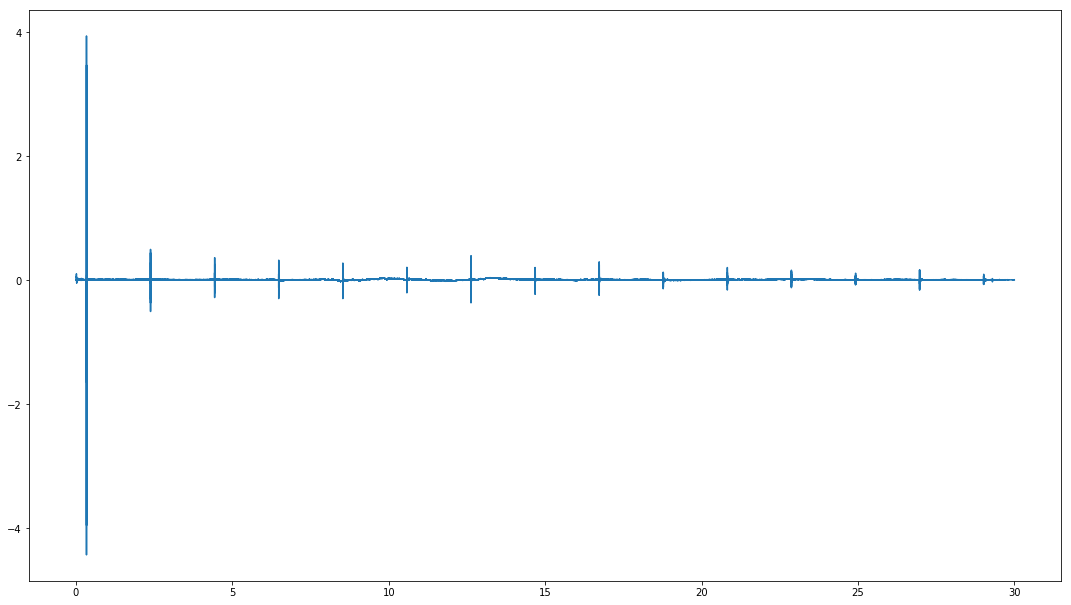

In [5]:
plot_graph(first_channel_rec[:,:])
first_channel_rec_cleaned = first_channel_rec[200000:300000,:]
second_channel_rec_cleaned = second_channel_rec[200000:300000,:]
third_channel_rec_cleaned = third_channel_rec[200000:300000,:]
fourth_channel_rec_cleaned = fourth_channel_rec[200000:300000,:]

np.shape(first_channel_rec_cleaned)

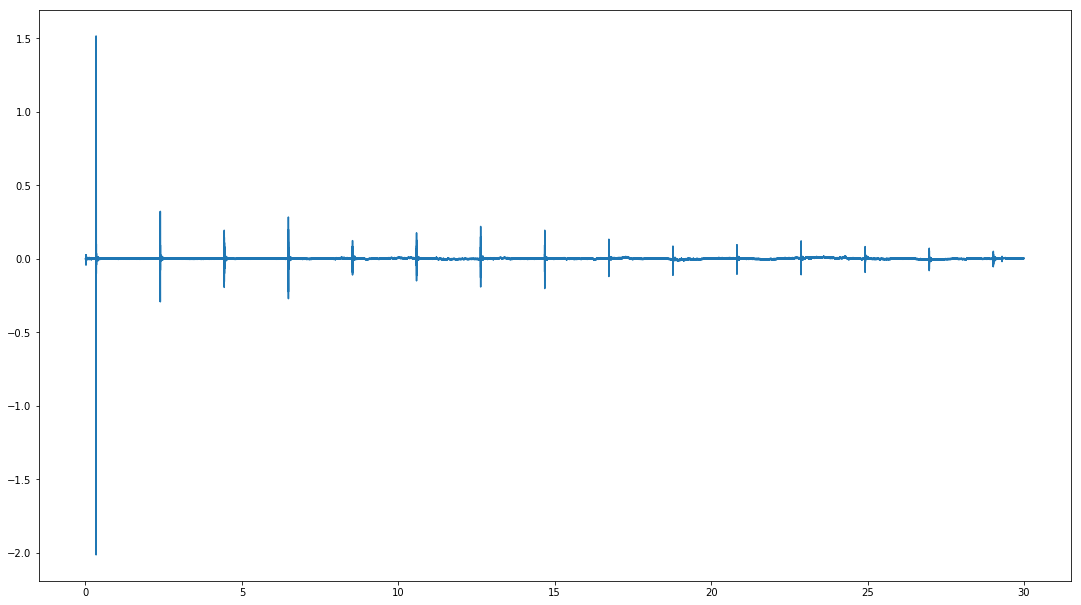

In [6]:
plot_graph(second_channel_rec)

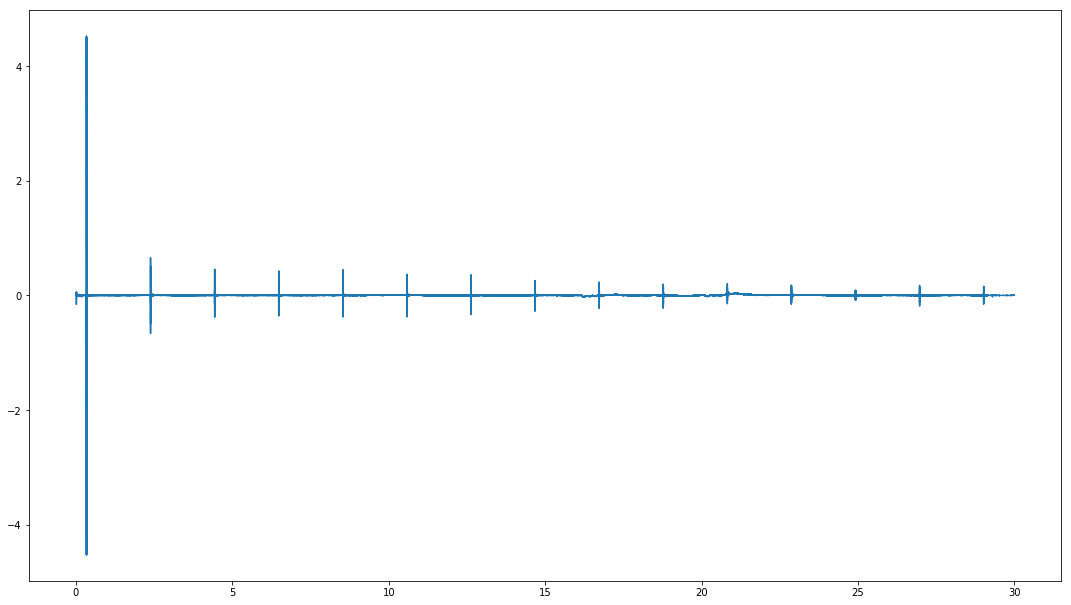

In [7]:
plot_graph(third_channel_rec)

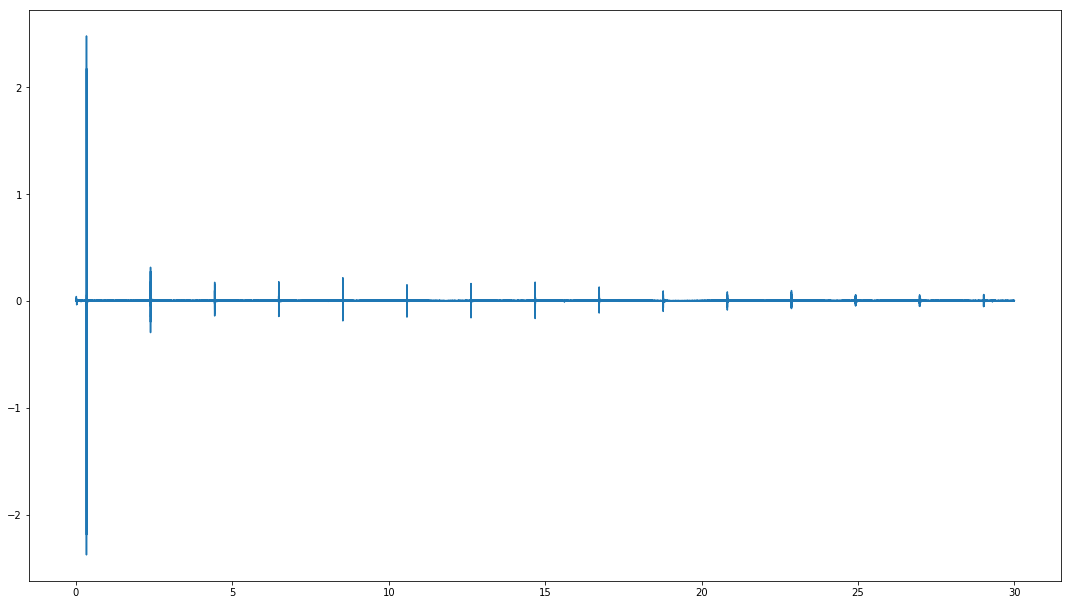

In [8]:
plot_graph(fourth_channel_rec)

In [9]:
data = first_channel_rec_cleaned[:,1]

def fftplot(data):
    i = 0
    sum = data[i]
    average = data[i]
    peak_i = 0
    while(i<len(data)):
        sum += abs(data[i])
        #print(sum)
        average = sum/(i+1)
        if(data[i] > 5*average):
            peak_i = i
            print(average)
            break
        i+=1
    print(peak_i)

    sample_length = 1024

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data[peak_i:peak_i+sample_length])
    #plt.plot(data[peak_i:])
    plt.show()

    arr = data[peak_i:peak_i+sample_length]
    sp = np.fft.fft(arr)
    freq = np.fft.fftfreq(arr.shape[-1], d=1e-5)
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(freq, sp.real, freq, sp.imag)

    amplitude = []
    i=0
    while(i<sample_length):
        amplitude.append((sp[i].imag**2+sp[i].real**2)//2)
        i+=1
        
    plt.show()
    #print(sp)
    #print(freq)
    print(amplitude)
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(amplitude)
    plt.show()
    print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))

    pinger_freq = 30e3
    data_point = int(pinger_freq/(freq[1]-freq[0])) + 1
    #plt.plot(data[peak_i:peak_i+128])
    print("The information about " + str(pinger_freq) + " is the data_point: " + str(data_point) + " at freq: " + str(freq[data_point]))
    data_pinger_freq = sp[data_point]
    print("The fft data at the data_point is: " + str(data_pinger_freq))
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    print("The phase at the values given is: " + str(phase_info))
    
    return phase_info, arr, sp
    


0.00653539682249434
38674


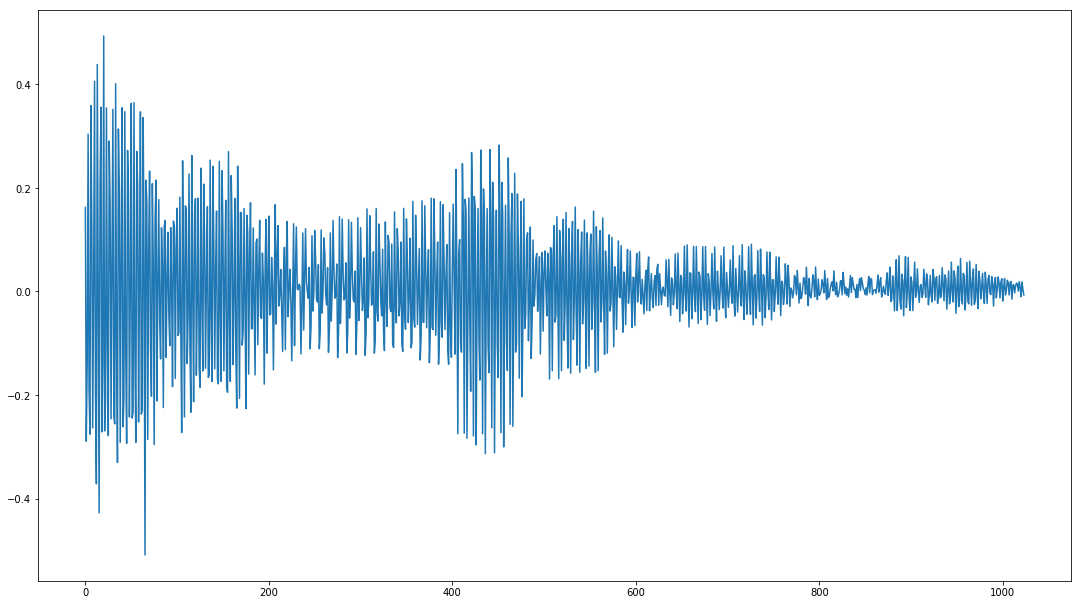

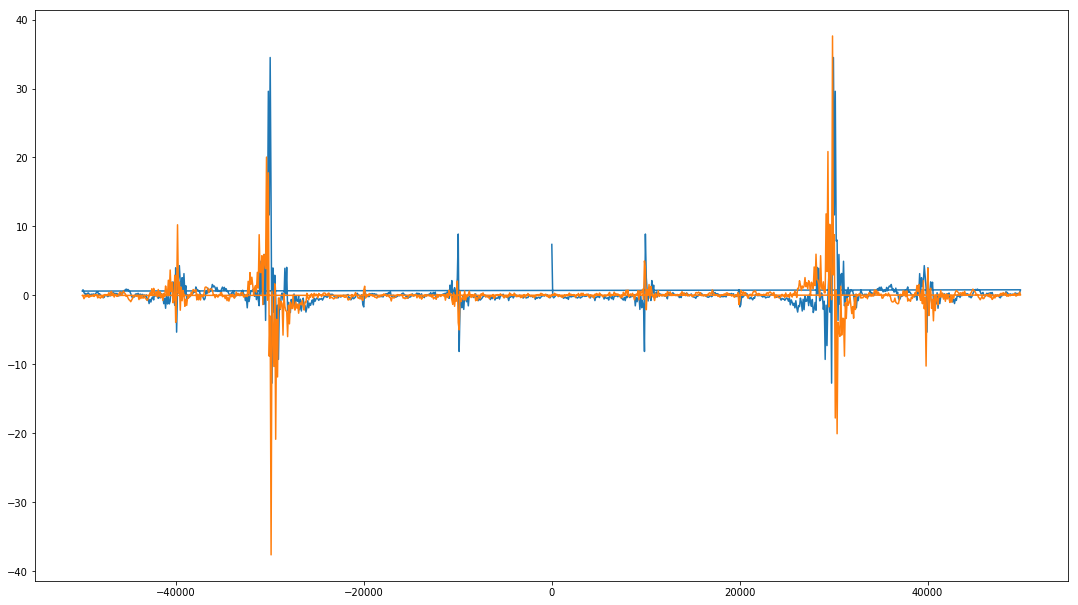

[27.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 45.0, 47.0, 5.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

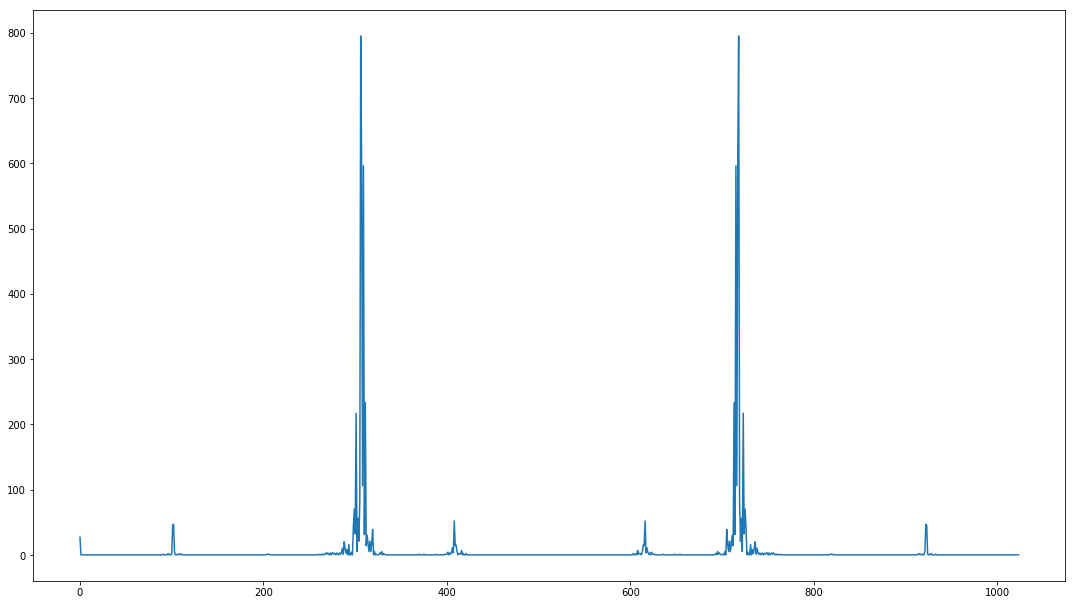

Shapes of sp: (1024,), freq:(1024,)
The information about 30000.0 is the data_point: 308 at freq: 30078.124999999996
The fft data at the data_point is: (11.67070728112883+8.815937864691298j)
The phase at the values given is: 37.06704151781545


In [10]:
p1,sign1, sp1 = fftplot(first_channel_rec_cleaned[:,1])

0.0022689879959663494
38674


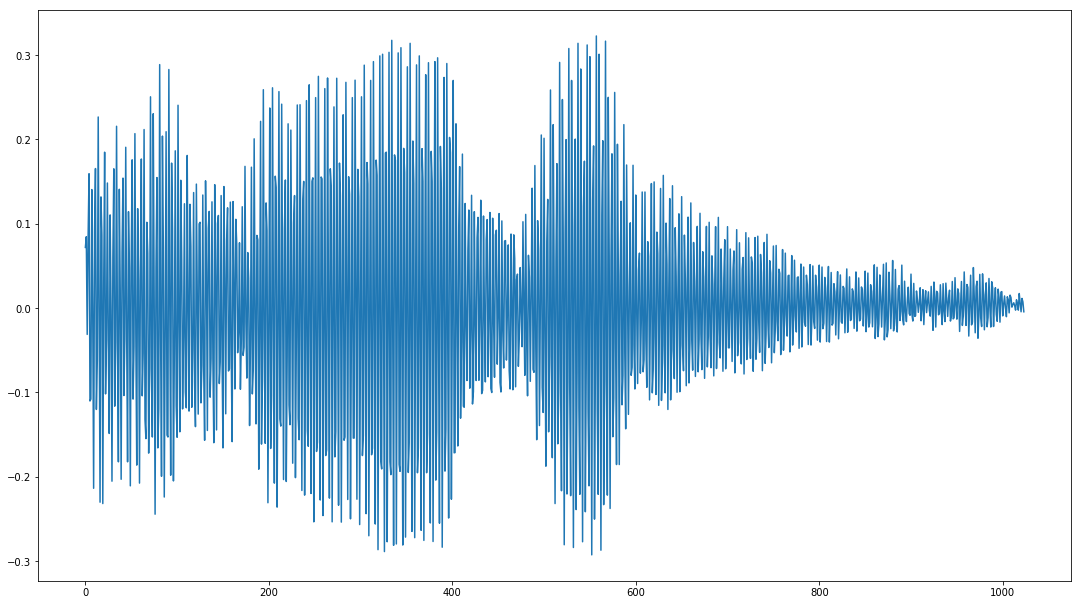

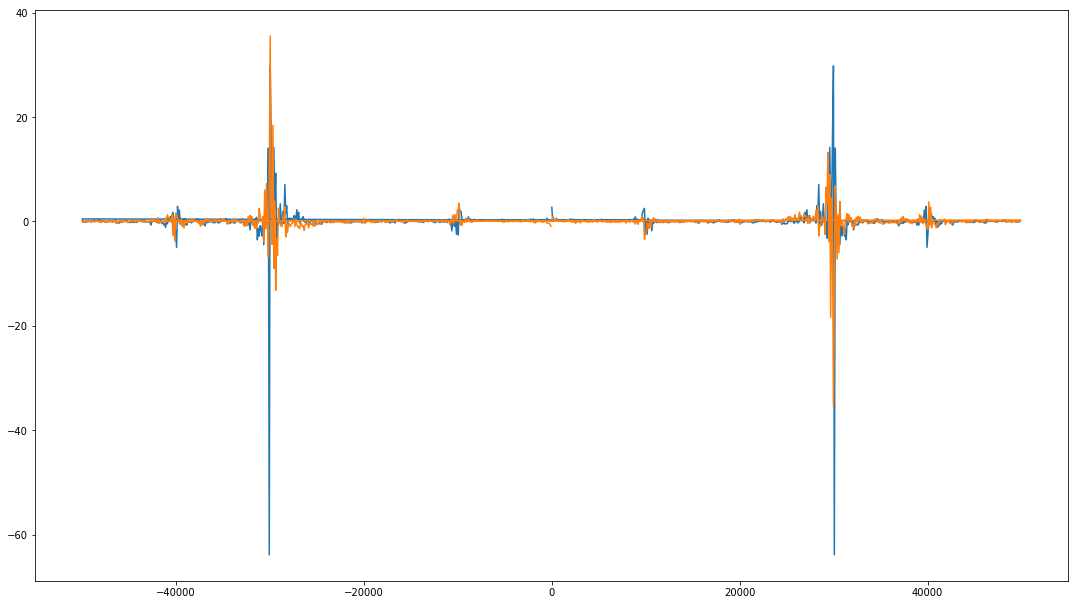

[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 9.0, 5.0, 2.0, 3.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

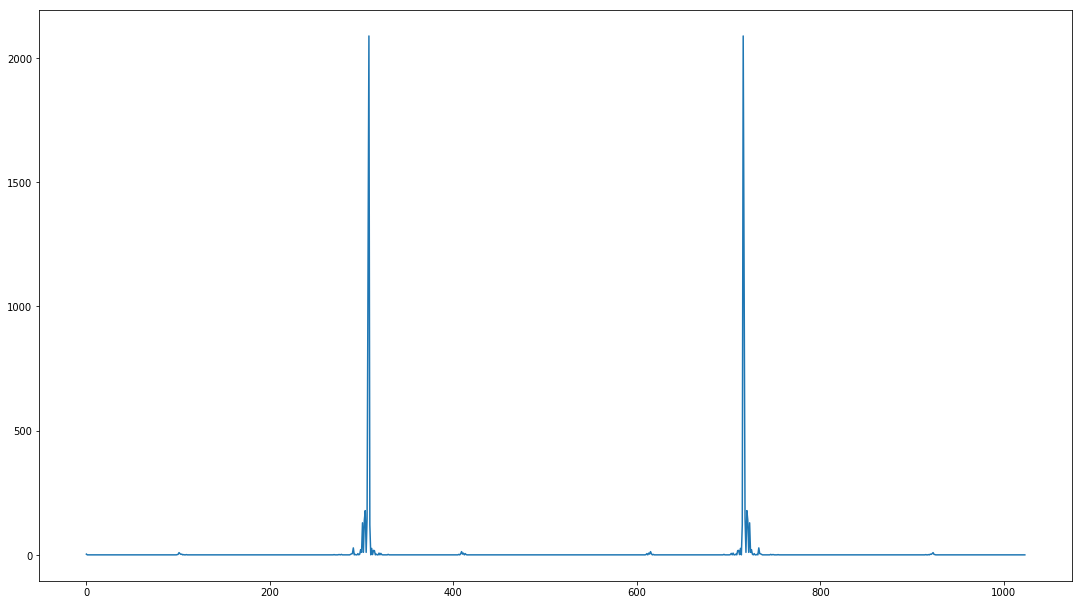

Shapes of sp: (1024,), freq:(1024,)
The information about 30000.0 is the data_point: 308 at freq: 30078.124999999996
The fft data at the data_point is: (-63.899069751496285-9.660620834356621j)
The phase at the values given is: 8.59719054697849


In [11]:
p2,sign2, sp2 = fftplot(second_channel_rec_cleaned[:,1])

0.002673844876713055
38673


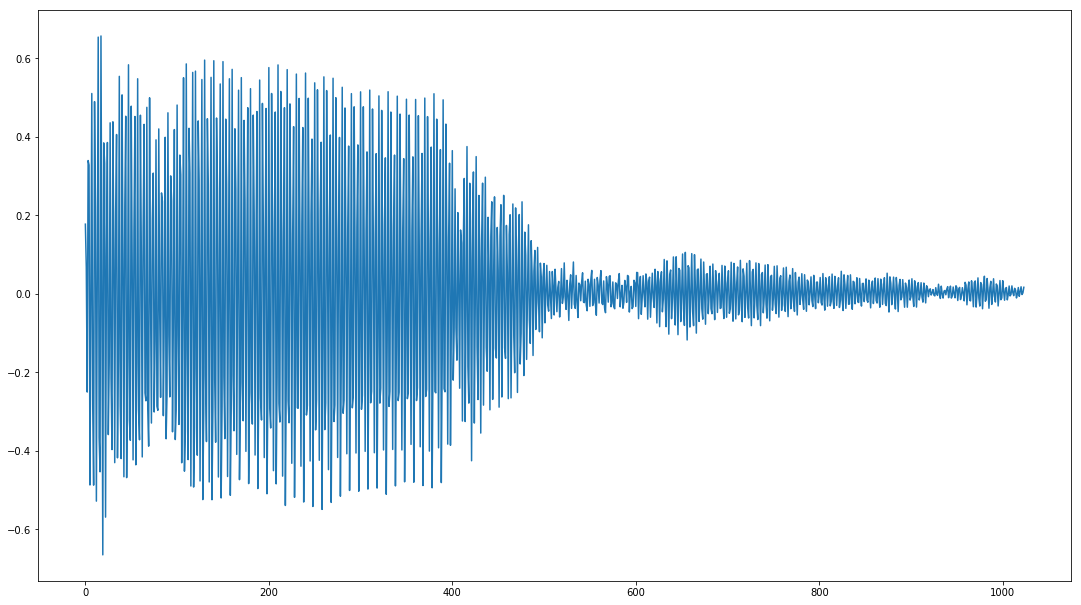

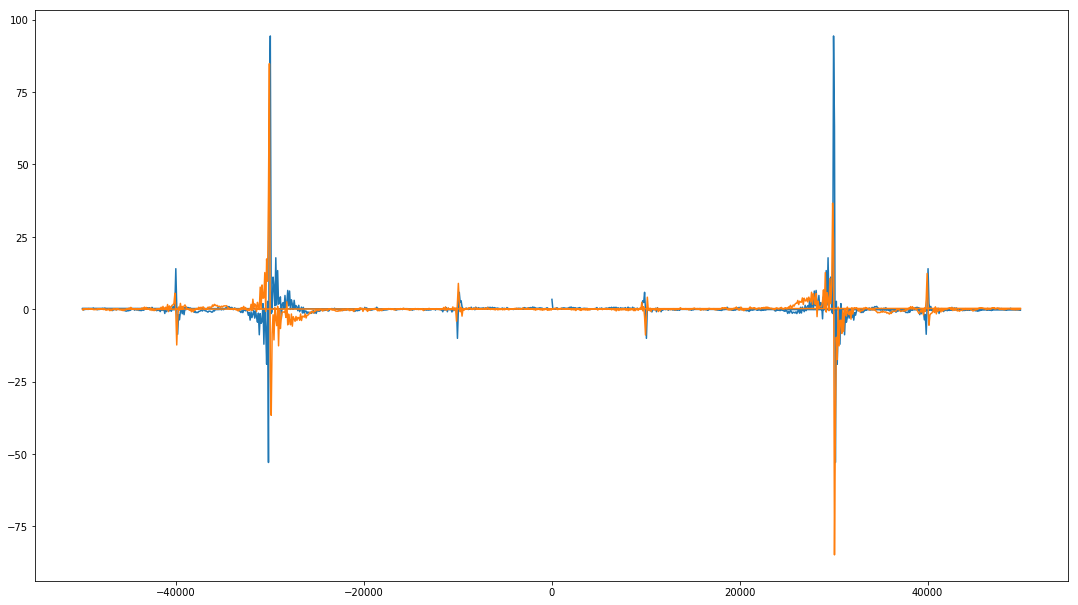

[5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 3.0, 20.0, 39.0, 53.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

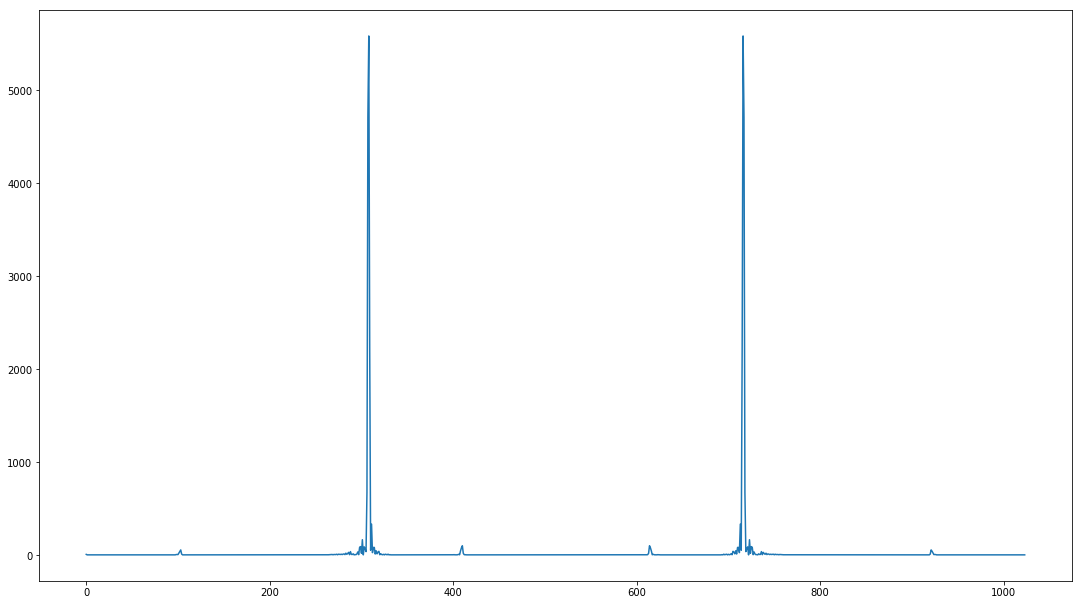

Shapes of sp: (1024,), freq:(1024,)
The information about 30000.0 is the data_point: 308 at freq: 30078.124999999996
The fft data at the data_point is: (63.0347002522559-84.85608512823805j)
The phase at the values given is: -53.39346850632122


In [12]:
p3,sign3, sp3 = fftplot(third_channel_rec_cleaned[:,1])

0.0015218527856181846
38673


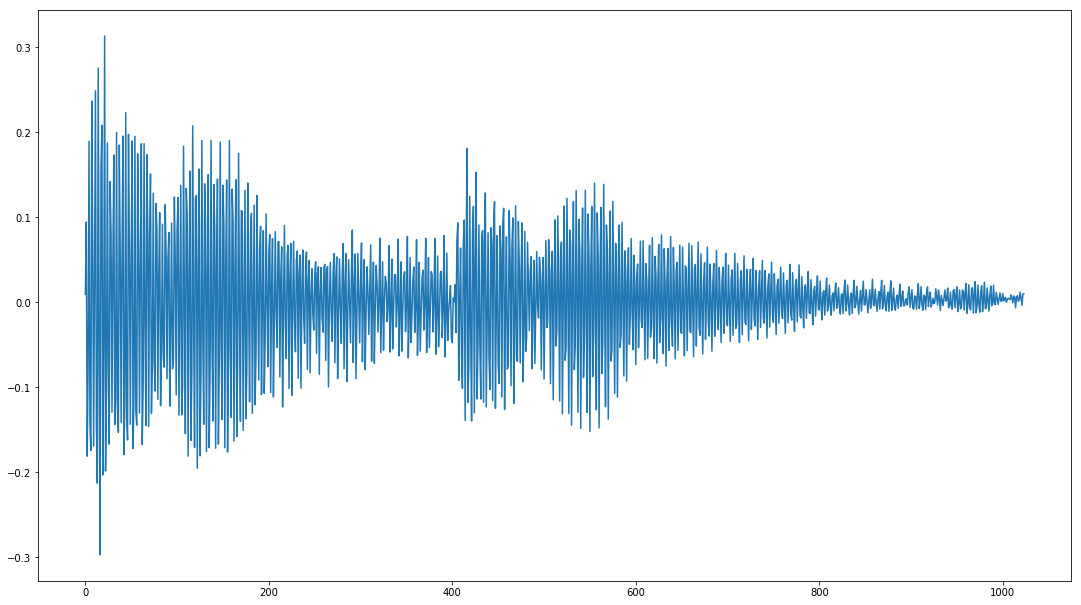

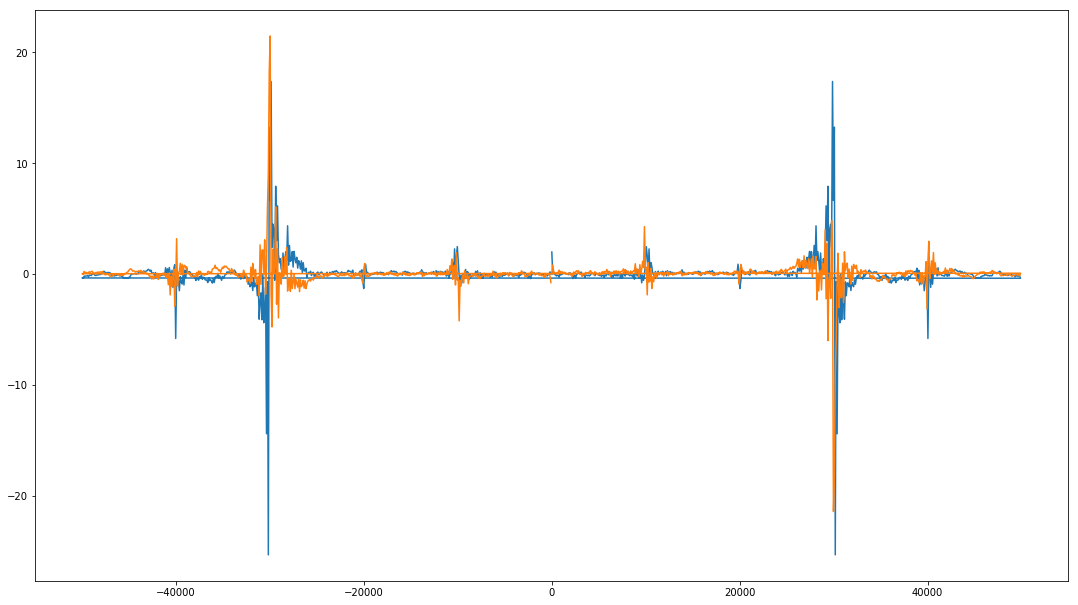

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 3.0, 3.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

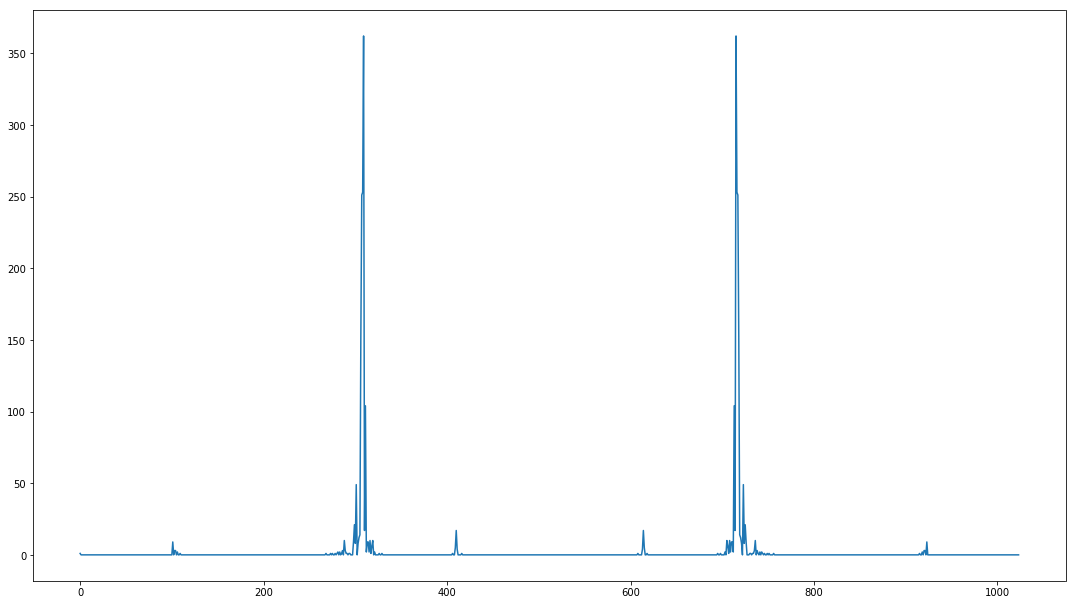

Shapes of sp: (1024,), freq:(1024,)
The information about 30000.0 is the data_point: 308 at freq: 30078.124999999996
The fft data at the data_point is: (13.223914684387793-18.237165676260027j)
The phase at the values given is: -54.05383242299288


In [13]:
p4,sign4, sp4 = fftplot(fourth_channel_rec_cleaned[:,1])

In [28]:
def correlate(data1, data2):
    np.pad(sign1, (0, len(data1)), 'constant')
    np.pad(sign2, (0, len(data2)), 'constant')

    correlation = np.fft.ifft(np.fft.fft(data1) * np.fft.fft(data2))
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    t=np.linspace(0,(len(correlation)),len(correlation))
    plt.subplot(3,1,3)
    plt.plot(t,abs(correlation))
    plt.xlabel("Time")
    plt.ylabel("Correlation")
    plt.show()
    #plt.plot(correlation.real)
    #plt.plot(correlation.imag)

    time_shift = np.argmax(abs(correlation))
    print(time_shift)
    plt.show()

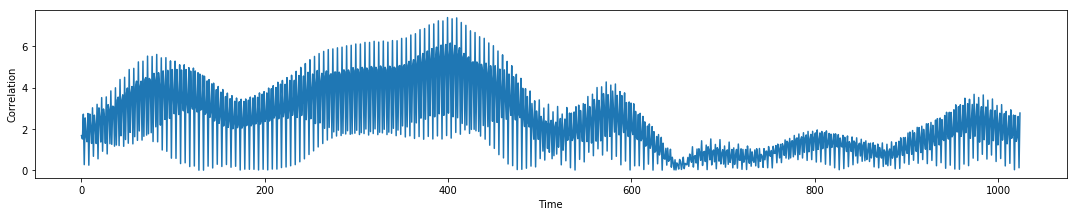

399


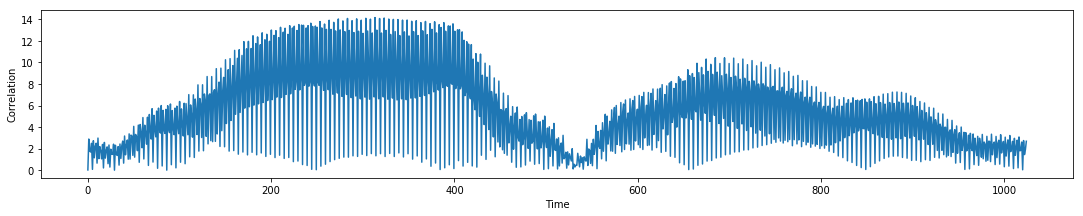

313


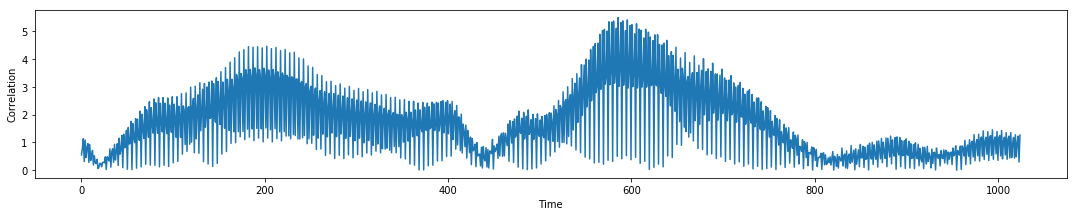

585


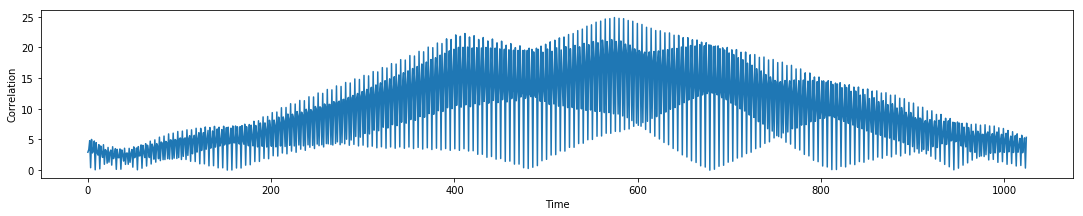

574


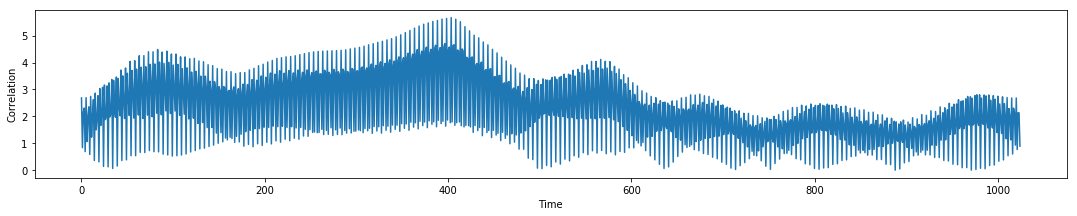

403


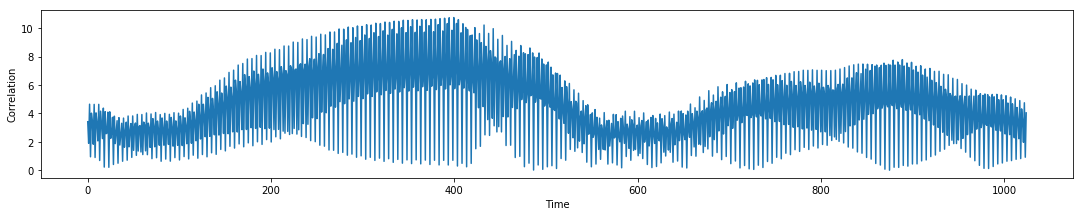

399


In [29]:
correlate(sign1, sign2)
correlate(sign1, sign3)
correlate(sign1, sign4)
correlate(sign2, sign3)
correlate(sign2, sign4)
correlate(sign3, sign4)

In [16]:
heading = math.atan((p1-p2)/(p3-p2))*180/math.pi
print("The heading calculated is: " + str(heading))

The heading calculated is: -24.667442224751223


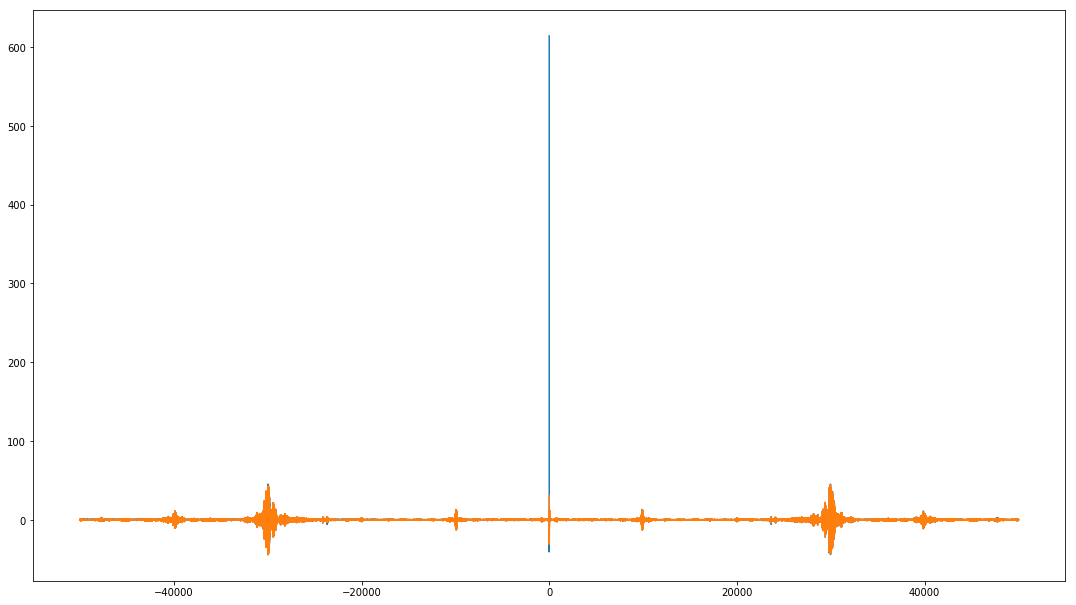

[614.17679436 +0.j         -40.19120121-30.9757855j
  -4.15352756-12.26309815j ...  -0.97427245 +2.32426199j
  -4.15352756+12.26309815j -40.19120121+30.9757855j ]
[ 0.  1.  2. ... -3. -2. -1.]
Shapes of sp: (100000,), freq:(100000,)


In [17]:
sp = np.fft.fft(first_channel_rec_cleaned[:,1])
freq = np.fft.fftfreq(first_channel_rec_cleaned[:,1].shape[-1], d=1e-5)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.plot(freq, sp.real, freq, sp.imag)

plt.show()
print(sp)
print(freq)
print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))

In [18]:
def music(data1, data2):
    positionsY = [0, 1.7]
    r = [0, positionsY[0]/1000, 0];
    Rxx = data

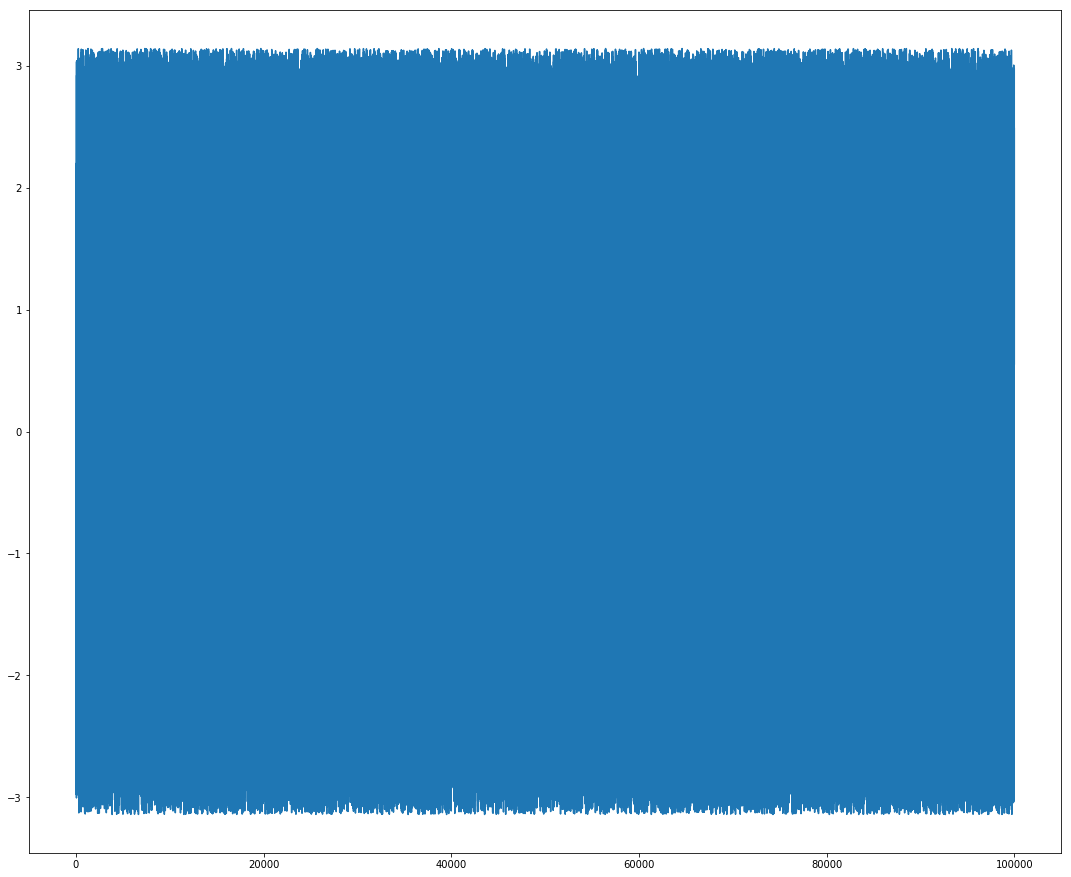

In [19]:
fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(np.angle(sp))

In [20]:
pinger_freq = 20e3
data_point = int(pinger_freq/8)
print("The information about " + str(pinger_freq) + " is the data_point: " + str(data_point))
data_pinger_freq = sp[data_point]
print("The fft data at the data_point is: " + str(data_pinger_freq))
phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
print("The phase at the values given is: " + str(phase_info))

The information about 20000.0 is the data_point: 2500
The fft data at the data_point is: (0.1767215972289456-0.14649690282225925j)
The phase at the values given is: -39.65771287241316


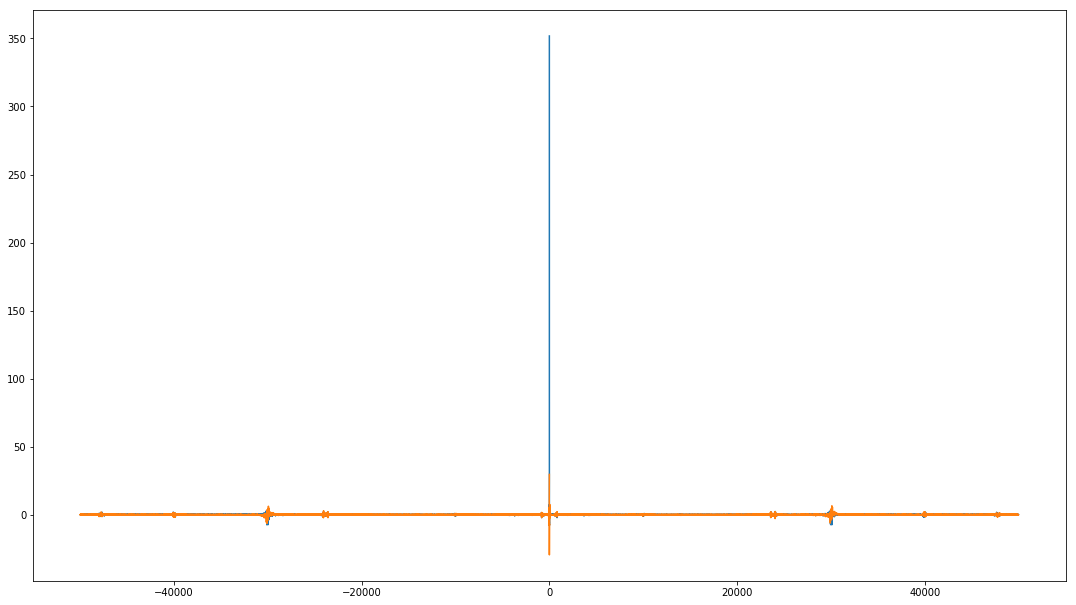

[351.83381126 +0.j          -5.67707464-29.5581295j
  -7.97027065 -4.58095436j ...   7.37177957 +9.37469988j
  -7.97027065 +4.58095436j  -5.67707464+29.5581295j ]
[ 0.          1.66666667  3.33333333 ... -5.         -3.33333333
 -1.66666667]
Shapes of sp: (60000,), freq:(60000,)
The information about 20000.0 is the data_point: 1200
The fft data at the data_point is: 1999.9999999999998
The phase at the values given is: -6.6428081782065265


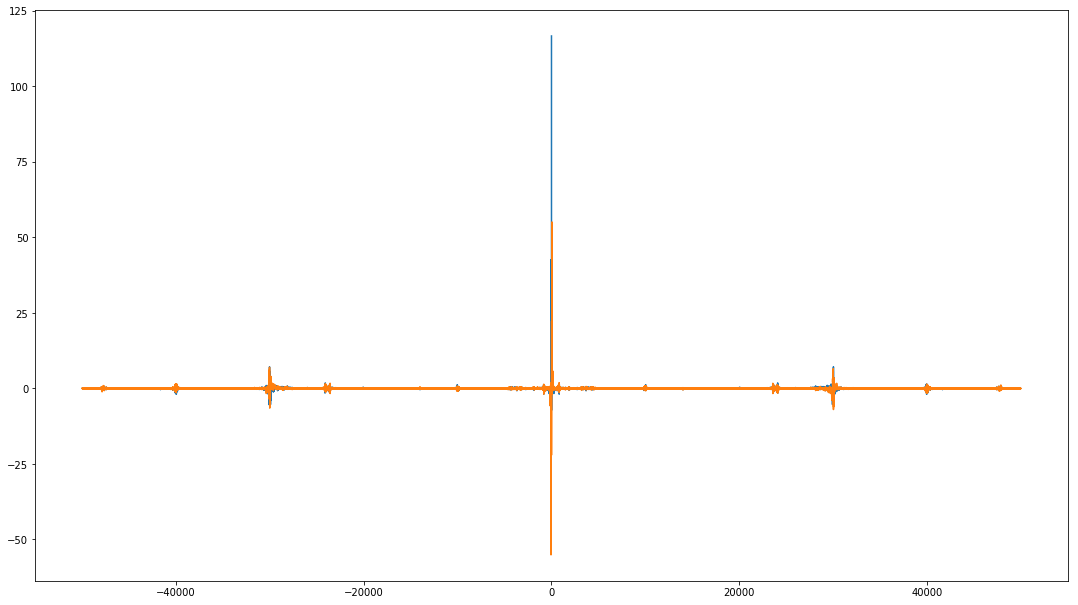

[116.64077494 +0.j          -7.18630767-22.06913231j
  -5.41349825 -7.73733082j ...   0.8132415 +14.18919602j
  -5.41349825 +7.73733082j  -7.18630767+22.06913231j]
[ 0.          1.66666667  3.33333333 ... -5.         -3.33333333
 -1.66666667]
Shapes of sp: (60000,), freq:(60000,)
The information about 20000.0 is the data_point: 1200
The fft data at the data_point is: 1999.9999999999998
The phase at the values given is: 32.65591634949382


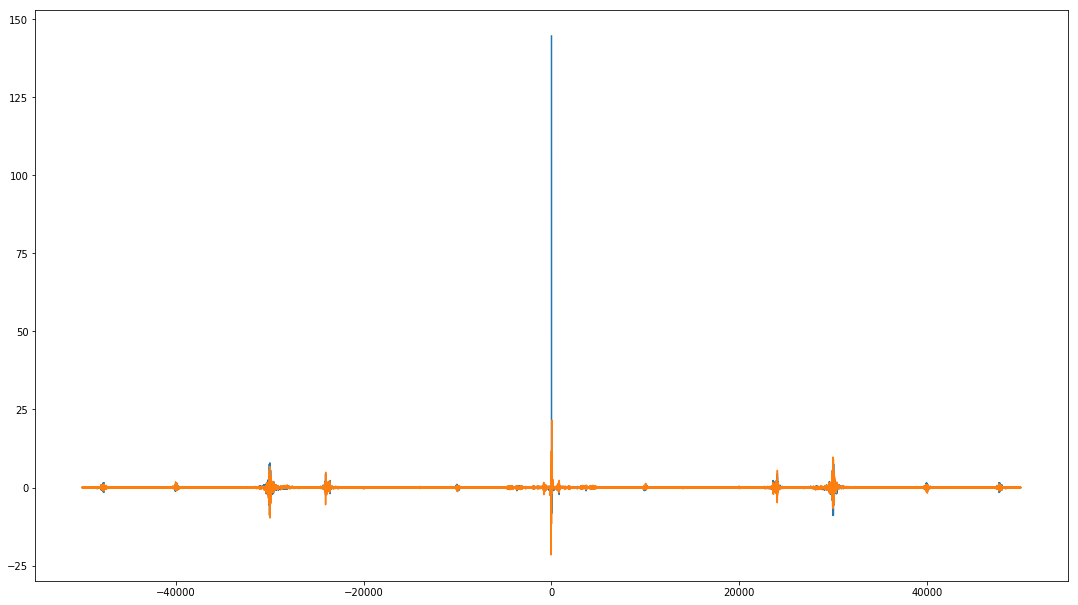

[144.53111812 +0.j          -0.44149351-11.67601975j
  -8.31378948 -5.98883504j ...   2.34707176 +9.09149284j
  -8.31378948 +5.98883504j  -0.44149351+11.67601975j]
[ 0.          1.66666667  3.33333333 ... -5.         -3.33333333
 -1.66666667]
Shapes of sp: (60000,), freq:(60000,)
The information about 20000.0 is the data_point: 1200
The fft data at the data_point is: 1999.9999999999998
The phase at the values given is: -12.06973622455597


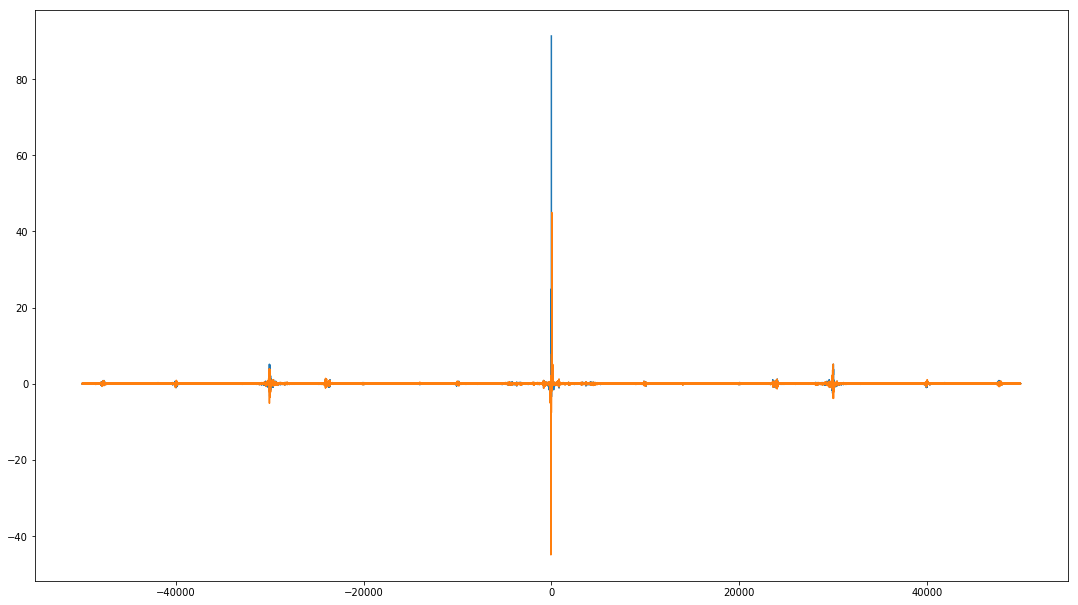

[91.33166064+0.j         -2.3589976 -7.62807127j -3.47034401-4.29351935j
 ... -0.22278904+5.80877025j -3.47034401+4.29351935j
 -2.3589976 +7.62807127j]
[ 0.          1.66666667  3.33333333 ... -5.         -3.33333333
 -1.66666667]
Shapes of sp: (60000,), freq:(60000,)
The information about 20000.0 is the data_point: 1200
The fft data at the data_point is: 1999.9999999999998
The phase at the values given is: 16.22713633787955
The three phases are: -6.6428081782065265, 32.65591634949382, -12.06973622455597, 16.22713633787955


In [21]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(freq, sp.real, freq, sp.imag)
    plt.show()
    print(sp)
    print(freq)
    print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    print("The information about " + str(pinger_freq) + " is the data_point: " + str(data_point))
    data_pinger_freq = freq[data_point]
    print("The fft data at the data_point is: " + str(data_pinger_freq))
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    print("The phase at the values given is: " + str(phase_info))
    return phase_info


first_phase = give_phase_in_degrees(first_channel_rec, 240000, 300000)
second_phase = give_phase_in_degrees(second_channel_rec, 240000, 300000)
third_phase = give_phase_in_degrees(third_channel_rec, 240000, 300000)
fourth_phase = give_phase_in_degrees(fourth_channel_rec, 240000, 300000)

print("The three phases are: {}, {}, {}, {}".format(first_phase, second_phase, third_phase, fourth_phase))

In [22]:
heading = math.atan((first_phase - third_phase)/(second_phase - third_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

heading = math.atan((first_phase - second_phase)/(third_phase - second_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

heading = math.atan((first_phase - third_phase)/(first_phase - second_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

The heading calculated is: 6.918343506375579
The heading calculated is: 41.30453928924884
The heading calculated is: -7.86249029214027


In [23]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    fig = plt.figure()
    fig.set_size_inches(18.5, 15.5)
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    data_pinger_freq = freq[data_point]
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    return phase_info

headings1 = []
headings2 = []
headings3 = []

i = 0
while i < 1400000:
    first_phase = give_phase_in_degrees(first_channel_rec, i, i+200000)
    second_phase = give_phase_in_degrees(second_channel_rec, i, i+200000)
    third_phase = give_phase_in_degrees(third_channel_rec, i, i+200000)
    fourth_phase = give_phase_in_degrees(fourth_channel_rec, i, i+200000)
    print("The time interval is: {} {}".format(i, i+200000))
    heading1 = math.atan((first_phase - third_phase)/(second_phase - third_phase))*180/math.pi
    heading2 = math.atan((first_phase - second_phase)/(third_phase - second_phase))*180/math.pi
    heading3 = math.atan((first_phase - third_phase)/(first_phase - second_phase))*180/math.pi
    headings1.append(heading1)
    headings2.append(heading2)
    headings3.append(heading3)
    print("The heading calculated is: {} {} {}".format(heading1, heading2, heading3))                                              
    print("---------------------------------------------------------------------------------")
    i+=200000

The time interval is: 0 200000
The heading calculated is: 10.280246593566824 39.304625062016015 -12.492648775916471
---------------------------------------------------------------------------------
The time interval is: 200000 400000
The heading calculated is: 82.00360961804033 -80.71790331296856 49.32016975310118
---------------------------------------------------------------------------------
The time interval is: 400000 600000
The heading calculated is: -72.32332982674447 76.41367274210594 37.17402901635659
---------------------------------------------------------------------------------
The time interval is: 600000 800000
The heading calculated is: -16.914894616062703 52.51871629470558 13.12633574351294
---------------------------------------------------------------------------------
The time interval is: 800000 1000000
The heading calculated is: -76.425074304023 78.99348737513279 38.85150387695974
---------------------------------------------------------------------------------
Th

/home/ayush/Projects/mlpython3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

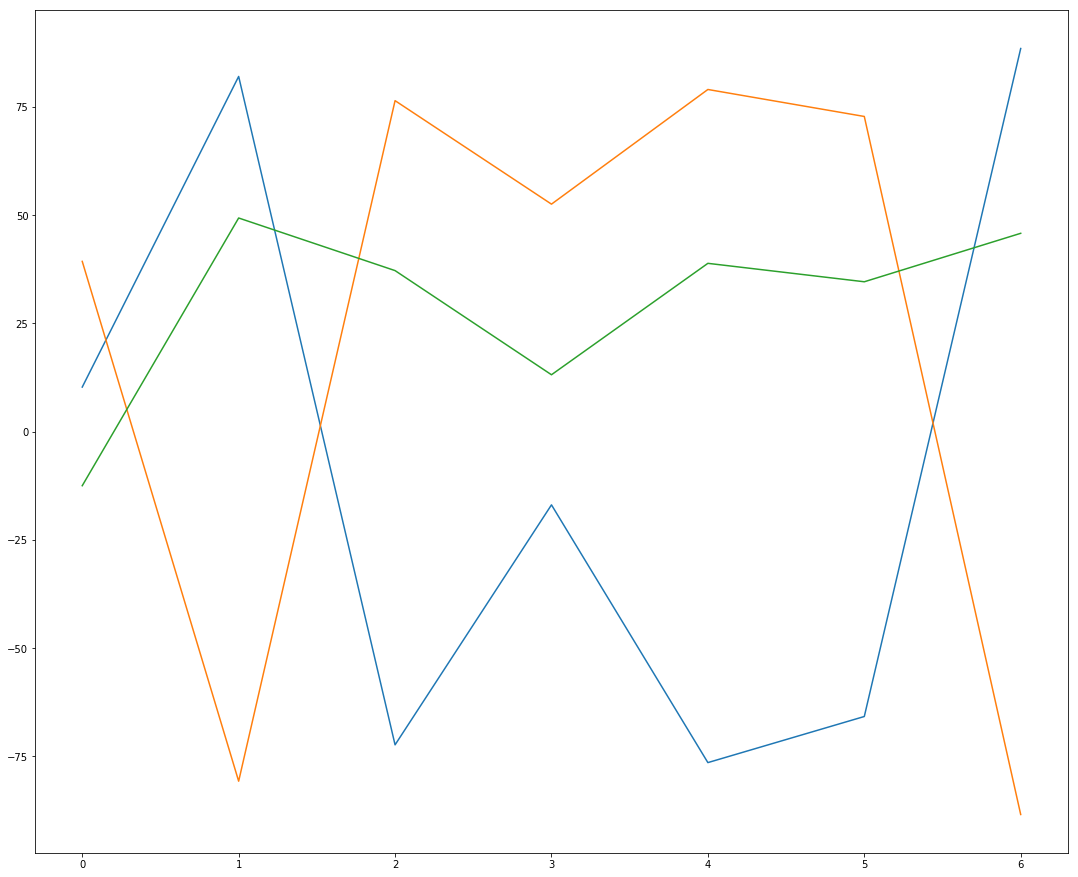

In [24]:
fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(headings1)
plt.plot(headings2)
plt.plot(headings3)

-8670

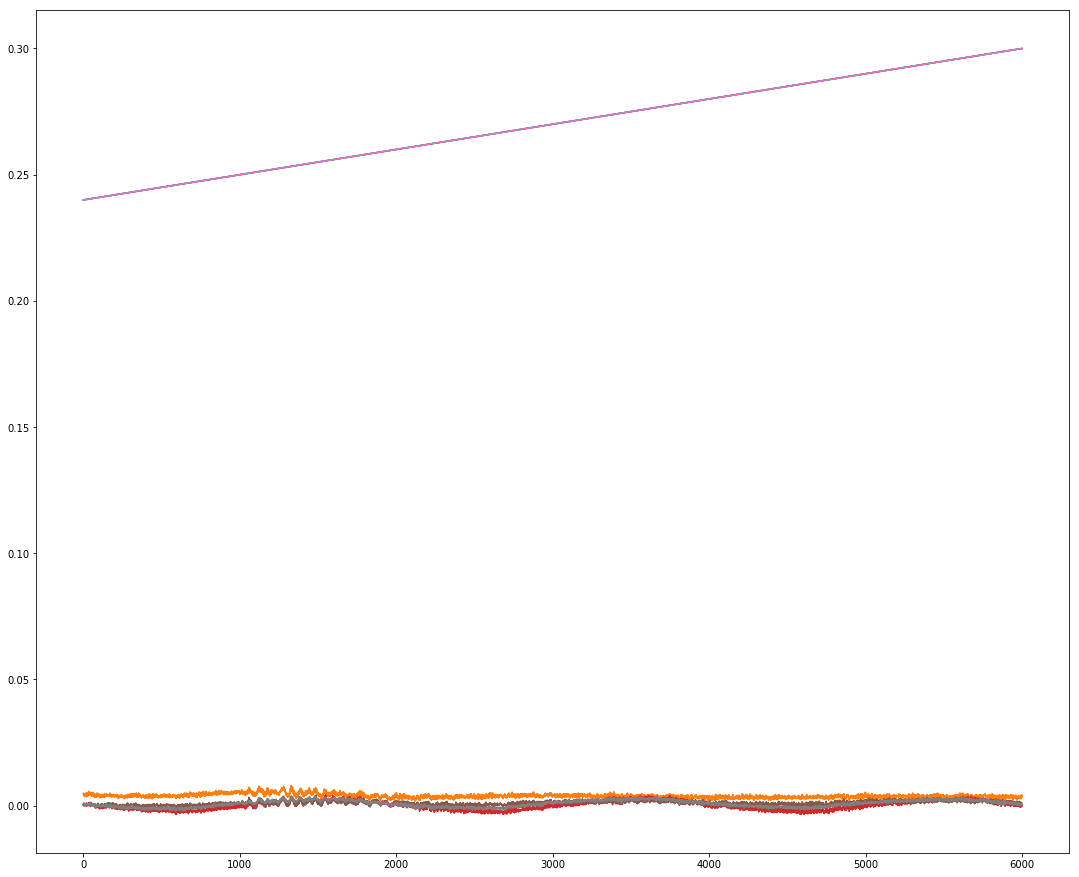

In [25]:
def cross_correlation_using_fft(x, y):
    f1 = np.fft.fft(x)
    
    # flip the signal of y
    f2 = np.fft.fft(np.flipud(y))
    cc = np.real(np.fft.ifft(f1 * f2))

    return np.fft.fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x 
# shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    # we make sure the length of the two signals are the same
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(first_channel_rec[24000:30000,:])
plt.plot(second_channel_rec[24000:30000,:])
plt.plot(third_channel_rec[24000:30000,:])
plt.plot(fourth_channel_rec[24000:30000,:])

compute_shift(first_channel_rec[24000:30000,:], second_channel_rec[24000:30000,:])

Array size: 6000, phase_info: -55.20061386693077, data_point: 120
Array size: 6000, phase_info: -67.1408321666884, data_point: 120
Array size: 6000, phase_info: -49.51574184322587, data_point: 120
Shape of fft array: (6000,)


/home/ayush/Projects/mlpython3.5/lib/python3.5/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


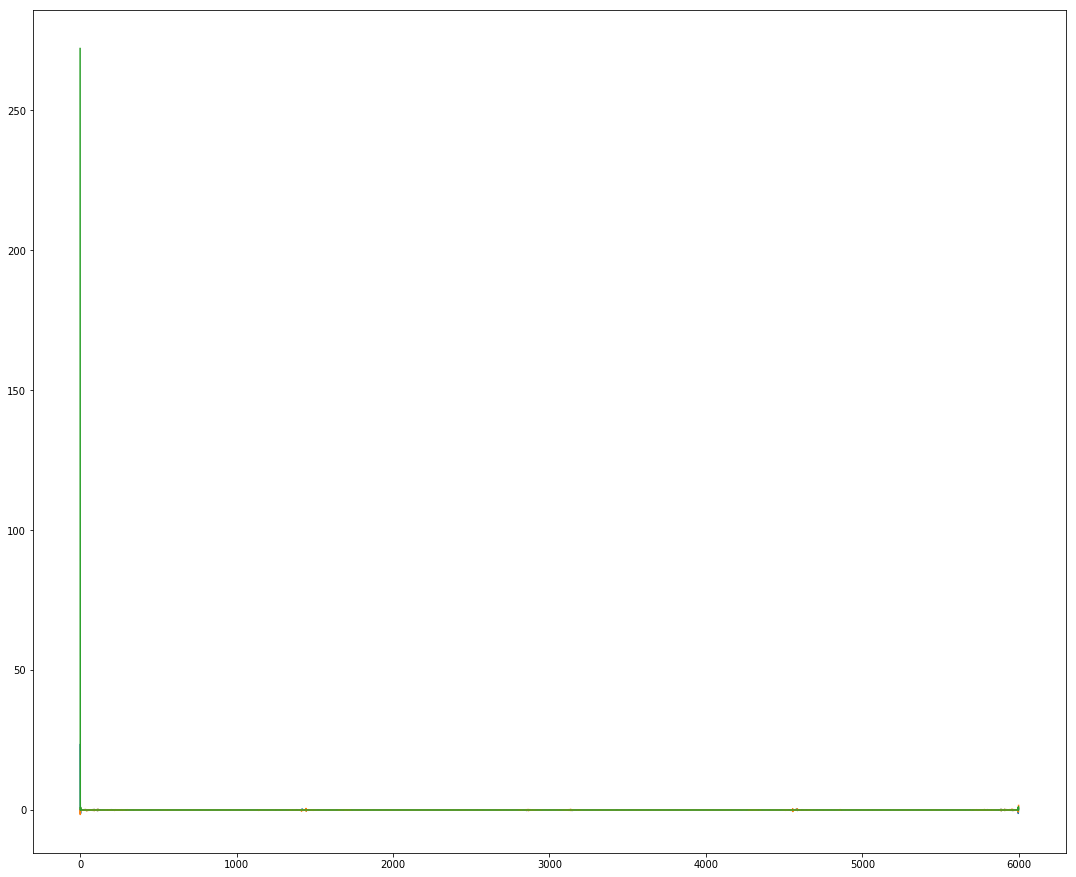

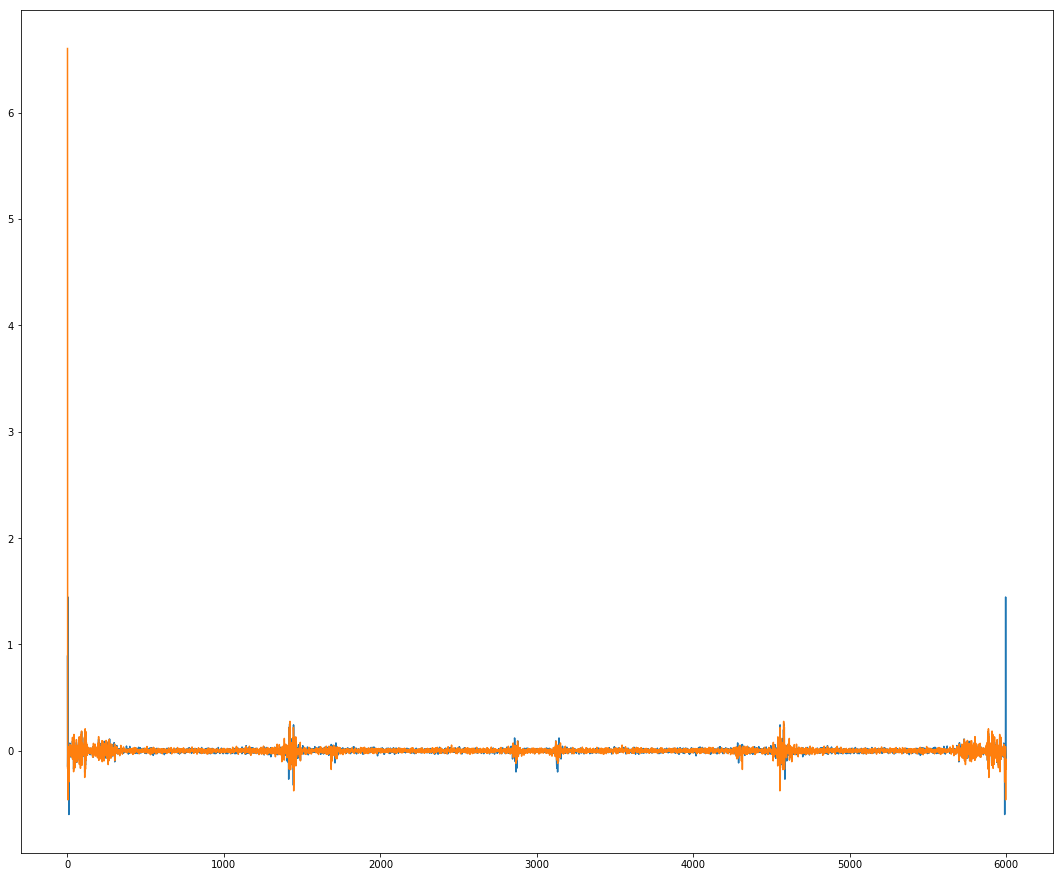

In [26]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    data_pinger_freq = freq[data_point]
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    print("Array size: {}, phase_info: {}, data_point: {}".format(j-i, phase_info, data_point))
    return phase_info, sp, freq

first_phase, first_sp, first_freq = give_phase_in_degrees(first_channel_rec, 24000, 30000)
second_phase, second_sp, second_freq = give_phase_in_degrees(second_channel_rec, 24000, 30000)
third_phase, third_sp, third_freq = give_phase_in_degrees(third_channel_rec, 24000, 30000)

print("Shape of fft array: {}".format(np.shape(first_sp)))

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
#plt.plot(first_freq)
plt.plot(first_sp.real)
plt.plot(first_sp.imag)
#plt.plot(first_freq, first_sp.real)
#plt.plot(first_freq, first_sp.imag)
plt.plot((first_sp.real**2 + first_sp.imag**2)//2)

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(second_sp)
plt.plot(third_sp)


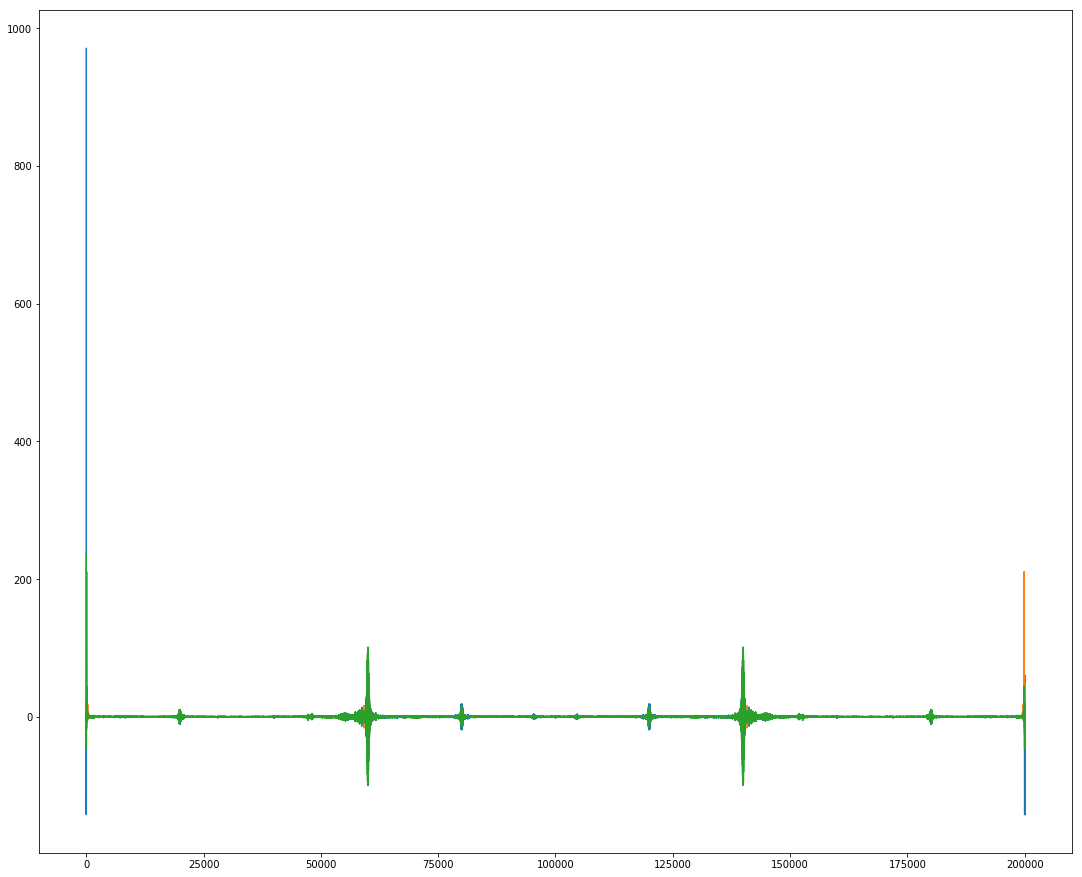

In [27]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    data_pinger_freq = freq[data_point]
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    return phase_info, sp

first_phase, first_sp = give_phase_in_degrees(first_channel_rec, 400000, 600000)
second_phase, second_sp = give_phase_in_degrees(second_channel_rec, 400000, 600000)
third_phase, third_sp = give_phase_in_degrees(third_channel_rec, 400000, 600000)

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(first_sp)
plt.plot(second_sp)
plt.plot(third_sp)
